# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
# a. Importando as bibliotecas
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
# a. Carregando a base
tips = sns.load_dataset('tips')

# a. Criando as variáveis
tips['bill'] = tips['total_bill'] - tips['tip']
tips['pc_tip'] = tips['tip']/tips['bill']

tips.head()

,total_bill,tip,sex,smoker,day,time,size,bill,pc_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.172069


In [3]:
# Conferindo se a base está limpa
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   bill        244 non-null    float64 
 8   pc_tip      244 non-null    float64 
dtypes: category(4), float64(4), int64(1)
memory usage: 11.2 KB


In [4]:
# a. Repetindo a regressão linear simples 
reg = smf.ols('tip ~ bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           5.02e-23
Time:                        02:11:07   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
bill           0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 10.5)

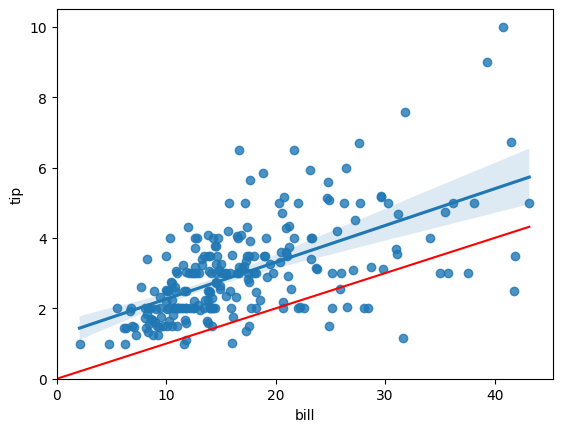

In [5]:
# b. Reproduzindo o gráfico de dipersão
sns.regplot(x = 'bill', y = 'tip', data = tips[tips['pc_tip']<.5])

# Linha de referência (10%)
x = np.linspace(0, tips['bill'].max(), 100)
y = .1*x

plt.plot(x, y, '-r', label = '10%')

# Ajustando a centralização do gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```%tip``` por ```bill```. Construa o gráfico de dispersão correspondente.

In [6]:
# Construindo o modelo de regressão linear
reg2 = smf.ols('pc_tip ~ bill', data=tips).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 pc_tip   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           1.52e-06
Time:                        02:11:07   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
bill          -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 0.505398619388979)

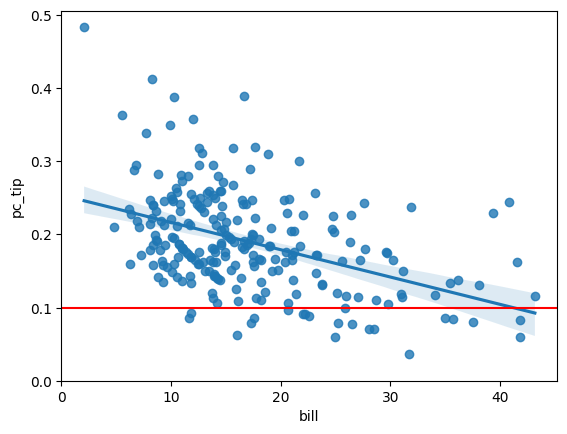

In [7]:
# Construindo o gráfico de dispersão
sns.regplot(x = 'bill', y = 'pc_tip', data = tips[tips['pc_tip'] <.5])

# Linha de referência (10%)
plt.axhline(y = 0.1, color='r', label='10%')

#Ajustando a centralização do gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

Podemos preceber que quando comparamos o valor da conta com o valor da gorjeta temos uma relação $positiva$ mais homogenea quando os valores da conta é inferior a, aproximadamente, 25. Enquanto que quando comparamos o valor da conta com a porcentagem da gorjeta temos uma relação $negativa$ mais centalizada ao longo de toda a linha de regressão, mas com alguns outliers mais divergentes dos que vemos na primeira. 

Como o R² é um valor de de variância dos dados podemos sim compará-los diretamente, e percebemos que do segundo modelo (0,091) é bem menor que o do primeiro (0.333), mostrando que, o primeiro modelo é melhor para explicar a proporção entre o valor da conta e a gorjeta. 

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [8]:
# 1. Valor predito da porcentagem de gorjeta em relação a toda a base de dados
pred = reg2.fittedvalues
pred.head(10)

0    0.207087
1    0.251951
2    0.197684
3    0.180107
4    0.176358
5    0.178817
6    0.263690
7    0.159273
8    0.224910
9    0.234313
dtype: float64

In [9]:
# 2. Valores predito da gorjeta
tip2 = pred*tips['bill']
tip2.head(10)

0    3.309254
1    2.186938
2    3.461450
3    3.668785
4    3.699998
5    3.680047
6    1.785180
7    3.784329
8    2.941822
9    2.706315
dtype: float64

In [10]:
# 3. Calculando o valor de R² desse modelo para o valor inteiro da gorjeta 
reg3 = smf.ols('tip2 ~ bill', data=tips).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   tip2   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     99.74
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           6.88e-20
Time:                        02:11:07   Log-Likelihood:                -192.63
No. Observations:                 244   AIC:                             389.3
Df Residuals:                     242   BIC:                             396.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2819      0.079     28.704      0.000       2.125       2.438
bill           0.0427      0.004      9.987      0.000       0.034       0.051
==============================================================================
Omnibus:                       97.034   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.025
Skew:                          -1.782   Prob(JB):                     5.74e-62
Kurtosis:                       6.878   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### 4. Comprarção dos valores de R²
O  valor original de R² era 0,333, enquanto o novo valor é 0,292. Portanto, o primeiro modelo apresentação valores preditos mais próximos dos obtidos nos resultados reais da base de dados análisada. 